In [5]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN, zadeh_t, lukasiewicz, fodor, drastic, einstein, t_norm_param
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

<H1>Przygotowanie zbioru danych<H1>

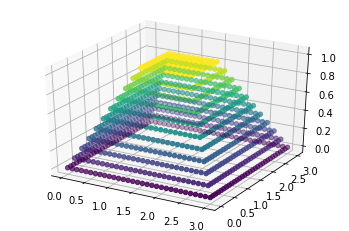

In [6]:
x = np.arange(0, 3.1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY = np.column_stack((dataX,dataY))

data_labels = []
for x, y in zip(dataX, dataY):
    x-=1.5
    y-=1.5
    data_labels.append( abs(x) if (y<x and y>-x) or (y>x and y<-x)  else abs(y) ) 
data_labels=np.array(data_labels)
#data_labels[data_labels>1.5] = 1.5
data_labels=abs(data_labels-1.5)
data_labels[data_labels>1] = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataX, dataY, data_labels, c=data_labels)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

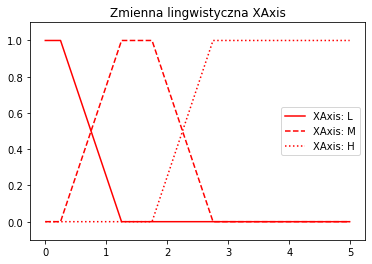

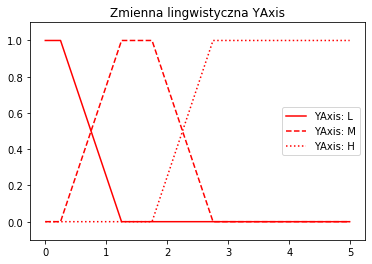

In [7]:
varX = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "XAxis", ["L","M","H"])
varY = FuzzyInputVariable_3Trapezoids(1.5, 0.5, 1, 1, "YAxis", ["L","M","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 5, 0.01))
plt.legend()

plt.show()

<H1>Uczenie systemu ANFIS</H1>

Optymalizacja zakończona!
z blędem:   28.55242995661451
Liczba ew:  299810
Liczba it:  100
FIS premises [[3.08507644 0.22016905 2.17490779 4.        ]
 [1.54060781 1.081216   0.95709579 0.89626138]]
TIME elapsed:  105.35734105110168


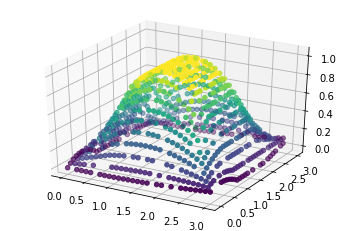

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, productN)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

<H1>Zadanie</H1>

Zaimplementuj wszystkie operatory rozmyte pokazane w pliku "Najczęściej stosowane t-normy". Następnie użyj ich do uczenia powyższego systemu ANFIS, która z nich jest najlepsza, jak myślisz dlaczego?

In [ ]:
%matplotlib auto

In [5]:
%matplotlib inline

Optymalizacja zakończona!
z blędem:   24.666626050232757
Liczba ew:  288552
Liczba it:  100
FIS premises [[3.30939654 0.68289234 2.124993   3.06677669]
 [1.54643653 1.15135563 0.83928428 0.80704086]]
TIME elapsed:  120.62662720680237


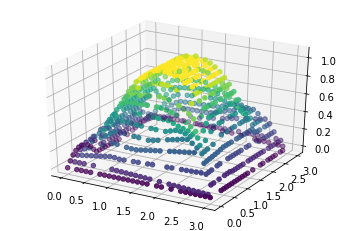

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, zadeh_t)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   24.04964037110277
Liczba ew:  309337
Liczba it:  100
FIS premises [[1.43374518 1.13251774 0.08049777 0.9997499 ]
 [1.50002077 0.99996612 0.99983357 0.99996752]]
TIME elapsed:  139.78456115722656


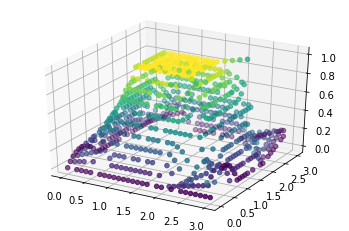

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, lukasiewicz)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   19.540969023073778
Liczba ew:  295304
Liczba it:  100
FIS premises [[1.43813904 1.12372583 0.03879969 0.99997584]
 [1.49999953 1.00000451 0.99999579 0.99999724]]
TIME elapsed:  131.67789769172668


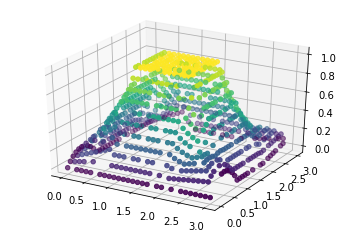

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, fodor)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   67.88378271890488
Liczba ew:  211612
Liczba it:  100
FIS premises [[1.49026778e+00 1.89820487e+00 1.66253636e+00 5.30079583e-14]
 [1.54636466e+00 9.07272299e-01 1.92726745e-01 9.99999018e-01]]
TIME elapsed:  140.595529794693


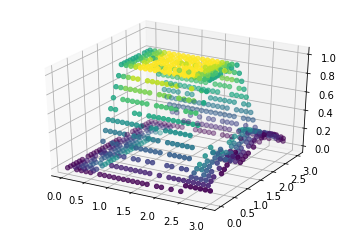

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, drastic)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   32.00115280708346
Liczba ew:  188020
Liczba it:  100
FIS premises [[3.31803699 0.68618101 2.17494587 0.71029879]
 [1.54090172 1.04694856 0.98105406 0.93078068]]
TIME elapsed:  87.06645393371582


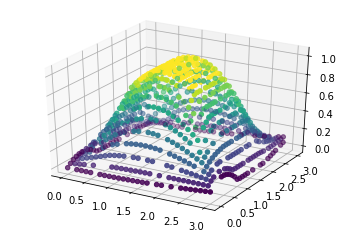

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, einstein)

start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)

Optymalizacja zakończona!
z blędem:   14.154682272410192
Liczba ew:  427600
Liczba it:  100
FIS premises [[3.30919531 0.65341805 2.96216298 3.13933707]
 [3.3654784  0.77155108 2.96032856 0.50422842]]
TIME elapsed:  191.16482424736023


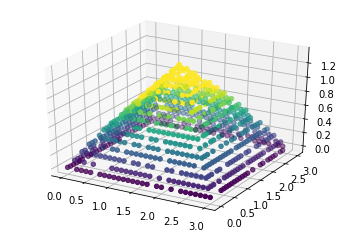

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train, t_norm_param)

start = time.time()
fis.train(True, True, True, True, n_iter=100)
end = time.time()
print("FIS premises", fis.premises)
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results(y_train)